In [196]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import re

import matplotlib.cm as cm
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=cm.Dark2.colors)

In [197]:
def extract_substring(file_path):
    pattern = r'.*/(mbb_SM_\d+mm|Leptoquark_SM_\d+mm)_smear_reco_merged\.txt'
    match = re.search(pattern, file_path)
    if match:
        return match.group(1)
    pattern = r'.*/(mbb_SM|Leptoquark_SM)_nexus_reco_merged\.txt'
    match = re.search(pattern, file_path)
    if match:
        return match.group(1)
    return None


In [198]:
files = sorted(glob.glob("../files/reco2/*"))

dfs = []
labels = []

for file_path in files:
    Model = extract_substring(file_path)
    print(Model, "loaded!")

    df = pd.read_csv(file_path, names=["event_id", "T1_gen", "costheta_gen", "T1_reco", "costheta_reco", "e_gamma"])
    df["event_id"] =  df['event_id'].astype(int)
    df = df.sort_values(by='event_id')
    dfs.append(df)
    labels.append(Model)




# dfs[0] = dfs[0][dfs[0].e_gamma < 0.05]
display(dfs[0])

display(dfs[0][dfs[0].costheta_gen >0.75])



Leptoquark_SM_10mm loaded!
Leptoquark_SM_1mm loaded!
Leptoquark_SM_2mm loaded!
Leptoquark_SM_4mm loaded!
mbb_SM_10mm loaded!
mbb_SM_1mm loaded!
mbb_SM_2mm loaded!
mbb_SM_4mm loaded!


,event_id,T1_gen,costheta_gen,T1_reco,costheta_reco,e_gamma
1178,25,1.471389,0.563857,1.471275,0.109578,0.000000
1179,26,1.728460,0.478581,2.358475,0.522571,0.661675
1180,27,2.237468,0.347120,2.297700,-0.862484,0.000000
1181,28,1.730651,-0.341447,1.737700,0.421091,1.002150
1182,29,2.291748,0.040423,2.333425,0.137659,0.076550
...,...,...,...,...,...,...
114,10020,2.283077,-0.356060,2.301262,0.303471,0.000000
115,10021,2.198926,0.723527,2.199812,0.531202,0.000000
116,10022,2.302391,0.899729,2.361587,0.333746,0.000000
117,10023,2.282756,-0.084471,2.358337,-0.281752,0.000000


,event_id,T1_gen,costheta_gen,T1_reco,costheta_reco,e_gamma
1184,31,1.323958,0.750299,1.347450,0.876725,0.00000
1194,41,1.484065,0.920721,1.484775,0.695520,0.04750
1195,42,2.322402,0.876718,2.369387,0.990761,0.15570
1200,47,1.853727,0.828354,1.854225,0.749953,0.00000
1154,51,1.712557,0.919045,1.715250,0.656623,0.00000
...,...,...,...,...,...,...
160,9991,2.019313,0.829280,1.813525,0.349167,0.00625
94,10000,2.217720,0.992278,2.339725,0.656825,0.33450
97,10003,1.286749,0.782463,1.270800,0.890564,0.00000
110,10016,1.343170,0.917110,1.337487,0.888436,0.00000


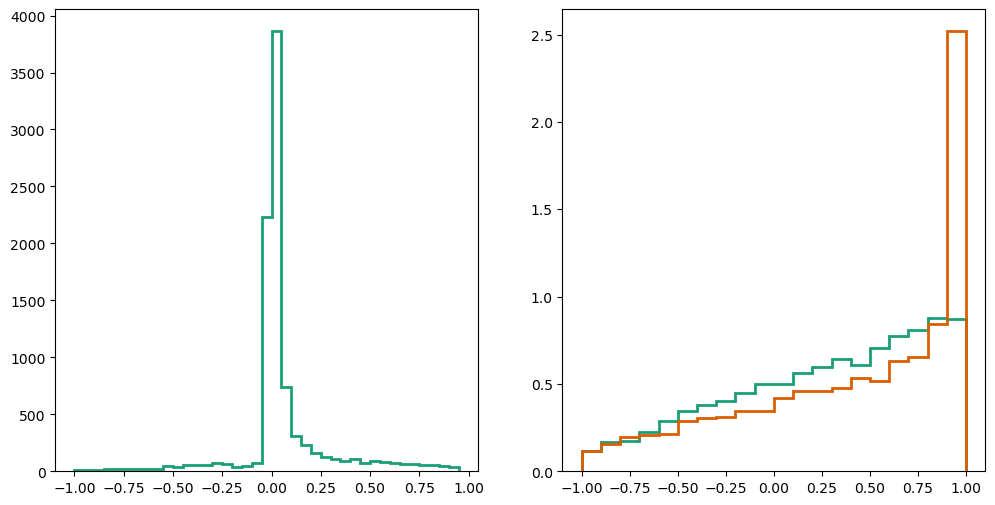

In [199]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))

# ax1.hist(dfs[0].T1_gen, bins = np.arange(1.2,2.4,0.05), histtype="step", linewidth=2);
# ax1.hist(dfs[0].T1_reco, bins = np.arange(1.2,2.4,0.05), histtype="step", linewidth=2);
ax1.hist(dfs[0].T1_reco - dfs[0].T1_gen, bins = np.arange(-1,1,0.05),log=False , histtype="step", linewidth=2);

ax2.hist(dfs[0].costheta_gen, bins = np.arange(-1,1.1,0.1), density=norm, log=useLog, histtype="step",  linewidth=2);
ax2.hist(dfs[0].costheta_reco, bins = np.arange(-1,1.1,0.1), density=norm, log=useLog, histtype="step", linewidth=2);

Text(0, 0.5, 'Entries')

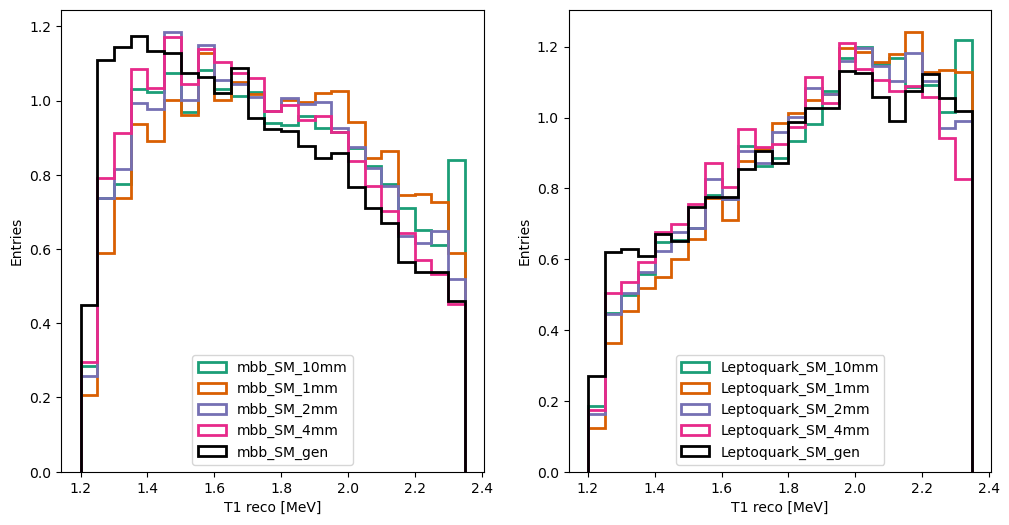

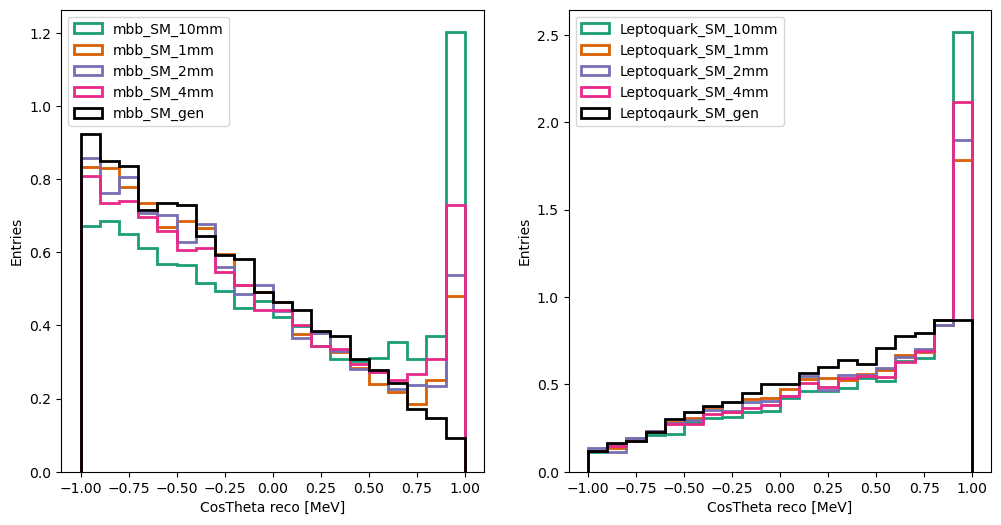

In [200]:
useLog=False
norm=True

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))

gen=False

for index, df in enumerate(dfs):

    if (index == 3 or index == 7):
        gen=True
    else:
        gen=False
    
    if ("mbb" in labels[index]):
        ax1.hist(df.T1_reco, bins = np.arange(1.2,2.4,0.05), density=norm, log=useLog, histtype="step", label = labels[index], linewidth=2);
        if(gen): ax1.hist(df.T1_gen, bins = np.arange(1.2,2.4,0.05), density=norm, log=useLog, histtype="step", label = "mbb_SM_gen", linewidth=2, color="k");

    elif ("Leptoquark" in labels[index]):
        ax2.hist(df.T1_reco, bins = np.arange(1.2,2.4,0.05), density=norm, log=useLog, histtype="step", label = labels[index], linewidth=2);
        if(gen): ax2.hist(df.T1_gen, bins = np.arange(1.2,2.4,0.05), density=norm, log=useLog, histtype="step", label = "Leptoquark_SM_gen", linewidth=2, color="k");


ax1.set_xlabel("T1 reco [MeV]")
ax2.set_xlabel("T1 reco [MeV]")
ax1.set_ylabel("Entries")
ax2.set_ylabel("Entries")

ax1.legend(loc="lower center")
ax2.legend(loc="lower center")

gen=False

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))
for index, df in enumerate(dfs):

    if (index == 3 or index == 7):
        gen=True
    else:
        gen=False

    if ("mbb" in labels[index]):
        ax1.hist(df.costheta_reco, bins = np.arange(-1,1.1,0.1), density=norm, log=useLog, histtype="step", label = labels[index], linewidth=2);
        if (gen): ax1.hist(df.costheta_gen, bins = np.arange(-1,1.1,0.1), density=norm, log=useLog, histtype="step", label = "mbb_SM_gen", linewidth=2,color="k");

    elif ("Leptoquark" in labels[index]):
        ax2.hist(df.costheta_reco, bins = np.arange(-1,1.1,0.1), density=norm, log=useLog, histtype="step", label = labels[index], linewidth=2);
        if (gen): ax2.hist(df.costheta_gen, bins = np.arange(-1,1.1,0.1), density=norm, log=useLog, histtype="step", label = "Leptoqaurk_SM_gen", linewidth=2,color="k")

# ax1.legend(loc="lower center")
# ax2.legend(loc="lower center")

ax1.legend(loc="upper left")
ax2.legend(loc="upper left")

ax1.set_xlabel("CosTheta reco [MeV]")
ax2.set_xlabel("CosTheta reco [MeV]")

ax1.set_ylabel("Entries")
ax2.set_ylabel("Entries")

Text(0, 0.5, 'Entries')

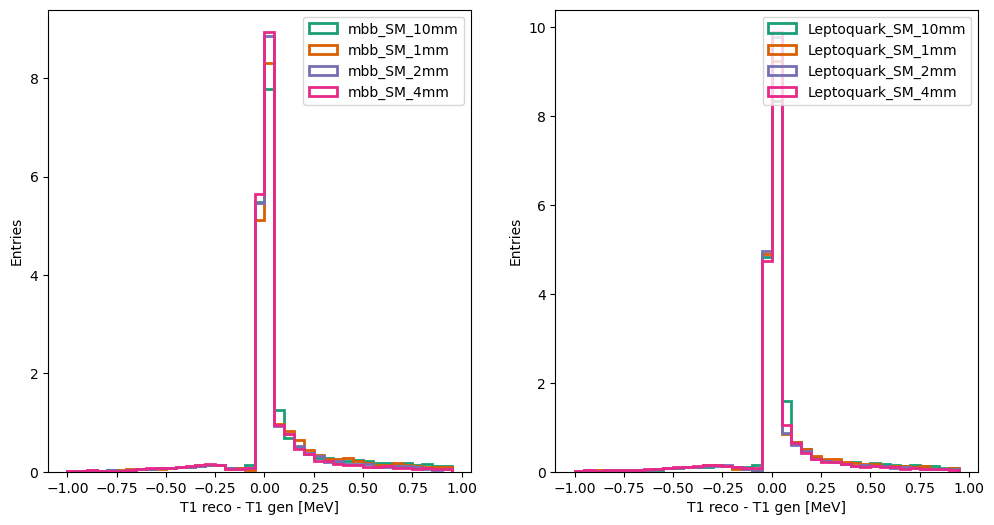

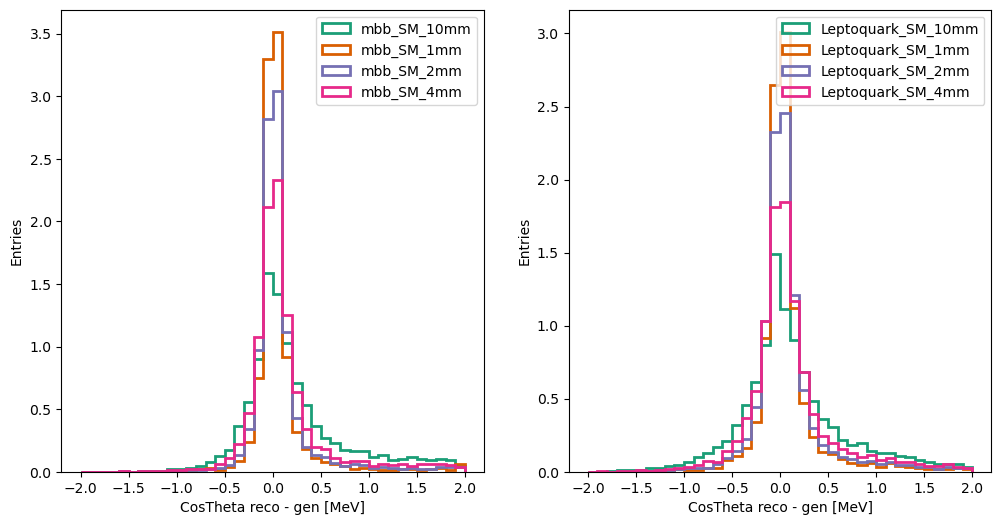

In [201]:
# Plot the reco-generator distributions

useLog=False

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))

for index, df in enumerate(dfs):
    
    if ("mbb" in labels[index]):
        ax1.hist(df.T1_reco - df.T1_gen, bins = np.arange(-1,1,0.05), density=norm, log=useLog, histtype="step", label = labels[index], linewidth=2);

    elif ("Leptoquark" in labels[index]):
        ax2.hist(df.T1_reco - df.T1_gen, bins = np.arange(-1,1,0.05), density=norm, log=useLog, histtype="step", label = labels[index], linewidth=2);


ax1.set_xlabel("T1 reco - T1 gen [MeV]")
ax2.set_xlabel("T1 reco - T1 gen [MeV]")
ax1.set_ylabel("Entries")
ax2.set_ylabel("Entries")

ax1.legend(loc="upper right")
ax2.legend(loc="upper right")


fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))
for index, df in enumerate(dfs):

    if ("mbb" in labels[index]):
        ax1.hist(df.costheta_reco - df.costheta_gen, bins = np.arange(-2,2.1,0.1), density=norm, log=useLog, histtype="step", label = labels[index], linewidth=2);

    elif ("Leptoquark" in labels[index]):
        ax2.hist(df.costheta_reco - df.costheta_gen, bins = np.arange(-2,2.1,0.1), density=norm, log=useLog, histtype="step", label = labels[index], linewidth=2);

ax1.legend(loc="upper right")
ax2.legend(loc="upper right")

ax1.set_xlabel("CosTheta reco - gen [MeV]")
ax2.set_xlabel("CosTheta reco - gen [MeV]")

ax1.set_ylabel("Entries")
ax2.set_ylabel("Entries")